# Welcome to nextnanopy !

## About this example: load a data file and make a simple plot

Our starting point is that there is no need for the user to know how the raw data is structure in the different data files like bandedges.dat or potential.fld. 

Therefore, our goal is to achieve the most user-friendly way to load all the information stored in any data file generated by nextnano products (nextnano++, nextnano3 or nextnano.NEGF).

## How to load a data file?

The simplest way is to use an universal class, ```nextnanopy.DataFile``` for any data file, like the following case:


```python
datafile = nextnanopy.DataFile(path_to_file, type = 'nextnano++')
```

This object contains all the relevant information of the data file:
- coordinates (or independent variables) like x, y, z, position
- variables (or dependent variables) like bandedges, electric field, density of electrons, energy levels, etc
- type (str): nextnano++, nextnano3 or nextnano.NEGF

In the case shown above, ```datafile``` was created by specifying ```type = 'nextnano++'```. This helps the class to look for the best loading routine for files generated by nextnano++. It will detect the dimension of the simulation (1D, 2D, 3D) and the file format (.dat, .fld, .txt), so it will choose the proper loading routine.

For example:

```python
datafile_1d = nextnanopy.DataFile('bandedges_1d.dat', type = 'nextnano++') # 1D .dat file
datafile_2d = nextnanopy.DataFile('bandedges_2d.fld', type = 'nextnano++') # 2D .fld file
```

In the case of ```bandedges_1d.dat```, there is one coordinate (x) and there are several variables (gamma band, electron fermi level, hole fermi level, etc). The structure in this file is a set of columns with a tabulator as delimiter.

On the other hand, ```bandedges_2d.fld```, there are two coordinates (x and y) and also with several variables. Moreover, the structure of the raw data is organized in a totally different way than ```bandedges_1d.dat```. 

The user-friendlyness relies on the fact that in spite of the differences in the file formats, an unique class is used to load the information: ```nextnanopy.Datafile```.

As a remark, you can omit the argument ```type```. In this case, it will try to detect automatically the nextnano product (nextnano++, nextnano3 or nextnano.NEGF), and then look for the best loading routine. This can be dangerous since it is not garanteed that the loaded data is correct. So, we recommend to always specify ```type```.


## Example of a 1D nextnano++ simulation

In [1]:
import nextnanopy as nn

datafile_1d = nn.DataFile(r'E:\junliang.wang\datafiles\nextnano++\bandedges_1d.dat',type='nextnano++')

## How to access to the coordinates?

You can access to the coordinates in ```datafile.coords```. It will return a dictionary of ```Coord``` objects.

```Coord``` objects contains information about:
- name (str)
- value (numpy.array)
- unit (str)
- dim (int)
- label (str, optional)
- metadata (dict, if there is any)

Each information is an attribute. For example, if you want to get the unit a coordinate:

```python
datafile.coords['x'].unit
```

In [2]:
print(f"List of coordinates in the current datafile: {datafile_1d.coords}")

List of coordinates in the current datafile: DictList([
(0,'x',Coord("x",...))
])


In [3]:
x = datafile_1d.coords['x']
print(f"coord 'x' - name: {x.name}")
print(f"coord 'x' - value (shape): {x.value.shape}")
print(f"coord 'x' - unit: {x.unit}")
print(f"coord 'x' - dim: {x.dim}")
print(f"coord 'x' - label: {x.label}")
print(f"coord 'x' - metadata: {x.metadata}")

coord 'x' - name: x
coord 'x' - value (shape): (548,)
coord 'x' - unit: nm
coord 'x' - dim: 0
coord 'x' - label: 
coord 'x' - metadata: {}


In [4]:
print(f"coord 'x' - value:")
print(x.value)

coord 'x' - value:
[  0.           0.5          1.           1.5          2.
   2.5          3.           3.5          4.           4.5
   5.           5.5          6.           6.5          7.
   7.5          8.           8.5          9.           9.5
  10.          10.5         11.          11.5         12.
  12.5         13.          13.5         14.          14.5
  15.          15.5         16.          16.5         17.
  17.5         18.          18.5         19.          19.5
  20.          20.5         21.          21.5         22.
  22.5         23.          23.5         24.          24.5
  25.          25.5         26.          26.5         27.
  27.5         28.          28.5         29.          29.5
  30.          30.50068388  30.99801858  31.4920265   31.98272989
  32.47015087  32.95431138  33.43523324  33.91293811  34.38744751
  34.85878282  35.32696526  35.79201593  36.25395578  36.71280562
  37.16858611  37.62131778  38.07102104  38.51771614  38.9614232
  39.40216221  3

## How to access to the variables?

Similarly, you can access to the dependent variables in ```datafile.variables```. It will return a dictionary of ```Variables``` objects.

```Variables``` objects contains information about:
- name (str)
- value (np.array)
- unit (str)
- label (str, optional)
- metadata (dict, if there is any)

As for ```Coords```, each information is an attribute. For example, if you want to get the unit:

```python
datafile.varaibles['Gamma'].unit
```

In [5]:
print(f"List of variables in the current datafile: {datafile_1d.variables}")

List of variables in the current datafile: DictList([
(0,'Gamma',Variable("Gamma",...)),
(1,'HH',Variable("HH",...)),
(2,'electron_Fermi_level',Variable("electron_Fermi_level",...)),
(3,'hole_Fermi_level',Variable("hole_Fermi_level",...))
])


In [6]:
key = 'Gamma'
var = datafile_1d.variables[key]
print(f"variables '{key}' - name: {var.name}")
print(f"variables '{key}' - value (shape): {var.value.shape}")
print(f"variables '{key}' - unit: {var.unit}")
print(f"variables '{key}' - label: {var.label}")
print(f"variables '{key}' - metadata: {var.metadata}")

variables 'Gamma' - name: Gamma
variables 'Gamma' - value (shape): (548,)
variables 'Gamma' - unit: eV
variables 'Gamma' - label: 
variables 'Gamma' - metadata: {}


In [7]:
print(f"variables '{key}' - value:")
print(var.value)

variables 'Gamma' - value:
[ 0.00000000e+00  0.00000000e+00  3.50000000e-01  6.80662149e-01
  6.61324297e-01  6.41986446e-01  6.22648594e-01  6.03310743e-01
  5.83972892e-01  5.64635040e-01  5.45297189e-01  5.25959337e-01
  5.06621486e-01  4.87283634e-01  4.67945783e-01  4.48607932e-01
  4.29270080e-01  4.09932229e-01  3.90594377e-01  3.71256526e-01
  4.84590934e-01  5.96547843e-01  5.75832492e-01  5.55117142e-01
  5.34401792e-01  5.13686442e-01  4.92971092e-01  4.72255742e-01
  4.51540392e-01  4.30825042e-01  4.10109692e-01  3.89394342e-01
  3.68678991e-01  3.47963641e-01  3.27248291e-01  3.06532941e-01
  2.85817591e-01  2.65102241e-01  2.44386891e-01  2.23671541e-01
  2.02956191e-01  1.82803025e-01  1.63774226e-01  1.45869796e-01
  1.29089733e-01  1.13434038e-01  9.89027115e-02  8.54957525e-02
  7.32131613e-02  6.20549380e-02  5.20210825e-02  4.31115949e-02
  3.53264751e-02  2.86657232e-02  2.31293392e-02  1.87173230e-02
  1.54296746e-02  1.32663941e-02  1.22274815e-02  1.23129367e-0

## Simple plot

As an example, we are going to plot together the gamma band and the electron fermi level. In this example, the data corresponds to a simulation of a GaAs heterostructure.

For this example, we will you ```matplotlib```, but you can use any other package!

<IPython.core.display.Javascript object>


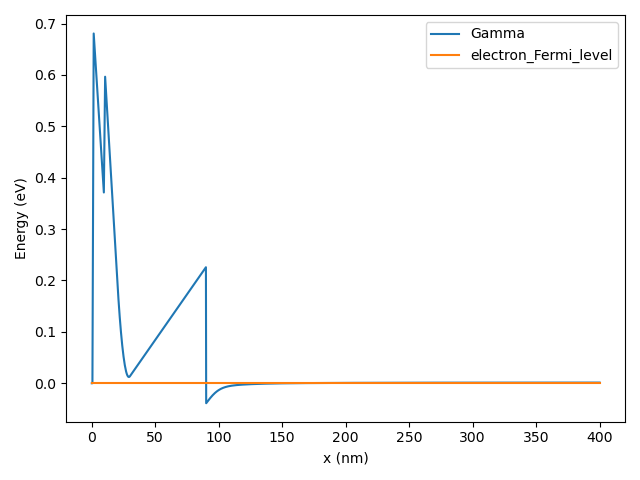

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots(1)
x = datafile_1d.coords['x']
gamma = datafile_1d.variables['Gamma']
efermi = datafile_1d.variables['electron_Fermi_level']

ax.plot(x.value,gamma.value,label=gamma.name)
ax.plot(x.value,efermi.value, label=efermi.name)

ax.set_xlabel(f"{x.name} ({x.unit})")
ax.set_ylabel(f"Energy ({gamma.unit})")
ax.legend()
fig.tight_layout()

## Example of data file from a 2D simulation

By using the same methods, we can access to the coordinates and the variables of a totally different data file.

Here, the data also corresponds to a GaAs heterostructure, but now we will plot the gamma band in the x and the y directions.

In [9]:
datafile_2d = nn.DataFile(r'E:\junliang.wang\datafiles\nextnano++\bandedges_2d.fld',type='nextnano++')

## Now there will be two coordinates: x and y

In [10]:
print(f"List of coordinates in the current datafile: {datafile_2d.coords}")

List of coordinates in the current datafile: DictList([
(0,'x',Coord("x",...)),
(1,'y',Coord("y",...))
])


## Variables can be accessed by the same method

In [11]:
print(f"List of variables in the current datafile: {datafile_2d.variables}")

List of variables in the current datafile: DictList([
(0,'Gamma',Variable("Gamma",...)),
(1,'electron_Fermi_level',Variable("electron_Fermi_level",...))
])


## You can verify that the number of points are correct

In [12]:
print(f"coord 'x' - value (shape): {datafile_2d.coords['x'].value.shape}")
print(f"coord 'y' - value (shape): {datafile_2d.coords['y'].value.shape}")
print(f"variables 'Gamma' - value (shape): {datafile_2d.variables['Gamma'].value.shape}")

coord 'x' - value (shape): (164,)
coord 'y' - value (shape): (79,)
variables 'Gamma' - value (shape): (164, 79)


## Let's make a simple color map!

<IPython.core.display.Javascript object>


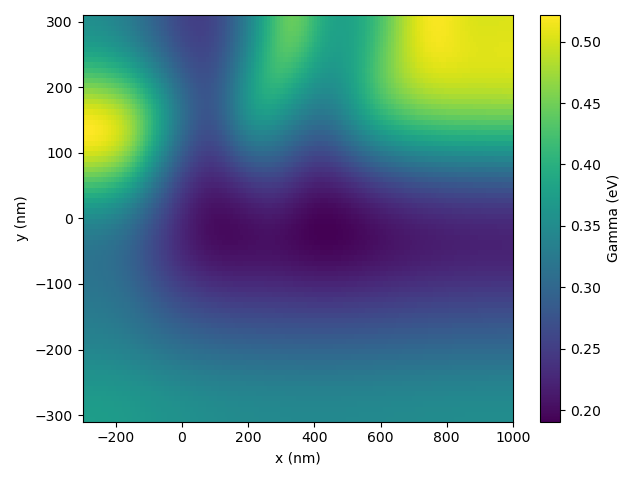

In [13]:
x=datafile_2d.coords['x']
y=datafile_2d.coords['y']
z=datafile_2d.variables['Gamma']

fig, ax = plt.subplots(1)
pcolor = ax.pcolormesh(x.value,y.value,z.value.T)
cbar = fig.colorbar(pcolor)
cbar.set_label(f"{z.name} ({z.unit})")

ax.set_xlabel(f"{x.name} ({x.unit})")
ax.set_ylabel(f"{y.name} ({y.unit})")

fig.tight_layout()

Please, contact python@nextnano.com for any issue with this example.